# Exercises in neural network and deep learning II

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

from tensorflow import keras
from tensorflow.keras import layers


In [17]:
adult = pd.read_csv('adult.csv')
ames = pd.read_csv('AmesHousing.csv')

## Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable `income`. 

In [18]:
adult_df = adult.dropna()

adult_x = adult_df[['age', 'workclass', 'education-num', 'hours-per-week', 'race', 'sex']]

adult_x.loc[:, 'age_bins'] = pd.cut(adult_x['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
adult_x.loc[:, 'hours_per_week_bins'] = pd.cut(adult_x['hours-per-week'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

adult_y = adult_df['income']
adult_y = adult_y.replace({'<=50K.': '<=50K', '>50K.': '>50K'})
adult_y = adult_y.replace({'<=50K': 0, '>50K': 1})

adult_x = pd.get_dummies(adult_x, columns=['age', 'workclass', 'education-num', 'hours-per-week', 'race', 'sex', 'age_bins', 'hours_per_week_bins'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(adult_x, adult_y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


display(adult_y.value_counts())
display(adult_x.head(5))
display(y_train)
print(adult_x.info())
print(adult_y.info())




/var/folders/yq/94jp9phd29s5g98ng2hwj0000000gn/T/ipykernel_93342/1769066790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_x.loc[:, 'age_bins'] = pd.cut(adult_x['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
/var/folders/yq/94jp9phd29s5g98ng2hwj0000000gn/T/ipykernel_93342/1769066790.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_x.loc[:, 'hours_per_week_bins'] = pd.cut(adult_x['hours-per-week'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20'

income
0    36080
1    11541
Name: count, dtype: int64

,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,...,race_White,sex_Male,age_bins_21-40,age_bins_41-60,age_bins_61-80,age_bins_81-100,hours_per_week_bins_21-40,hours_per_week_bins_41-60,hours_per_week_bins_61-80,hours_per_week_bins_81-100
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


array([0, 0, 1, ..., 0, 0, 0])

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Columns: 204 entries, age_18 to hours_per_week_bins_81-100
dtypes: bool(204)
memory usage: 9.6 MB
None
<class 'pandas.core.series.Series'>
Index: 47621 entries, 0 to 48841
Series name: income
Non-Null Count  Dtype
--------------  -----
47621 non-null  int64
dtypes: int64(1)
memory usage: 744.1 KB
None


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train_scaled,
                    y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/50
477/477 [==============================] - 1s 671us/step - loss: 0.4772 - accuracy: 0.7642 - val_loss: 0.4351 - val_accuracy: 0.7825
Epoch 2/50
477/477 [==============================] - 0s 514us/step - loss: 0.4323 - accuracy: 0.7962 - val_loss: 0.4237 - val_accuracy: 0.8021
Epoch 3/50
477/477 [==============================] - 0s 508us/step - loss: 0.4231 - accuracy: 0.8005 - val_loss: 0.4197 - val_accuracy: 0.8034
Epoch 4/50
477/477 [==============================] - 0s 510us/step - loss: 0.4180 - accuracy: 0.8037 - val_loss: 0.4161 - val_accuracy: 0.8067
Epoch 5/50
477/477 [==============================] - 0s 507us/step - loss: 0.4142 - accuracy: 0.8063 - val_loss: 0.4150 - val_accuracy: 0.8075
Epoch 6/50
477/477 [==============================] - 0s 509us/step - loss: 0.4123 - accuracy: 0.8085 - val_loss: 0.4134 - val_accuracy: 0.8075
Epoch 7/50
477/477 [==============================] - 0s 507us/step - loss: 0.4102 - accuracy: 0.8091 - val_loss: 0.4123 - val_accuracy:

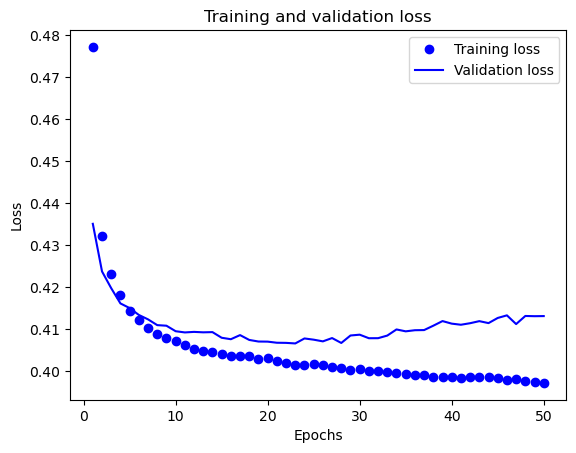

In [20]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train_scaled,
                    y_train,
                    epochs=8,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/8
477/477 [==============================] - 1s 698us/step - loss: 0.4761 - accuracy: 0.7692 - val_loss: 0.4285 - val_accuracy: 0.8020
Epoch 2/8
477/477 [==============================] - 0s 532us/step - loss: 0.4250 - accuracy: 0.8014 - val_loss: 0.4174 - val_accuracy: 0.8051
Epoch 3/8
477/477 [==============================] - 0s 564us/step - loss: 0.4172 - accuracy: 0.8067 - val_loss: 0.4134 - val_accuracy: 0.8071
Epoch 4/8
477/477 [==============================] - 0s 657us/step - loss: 0.4136 - accuracy: 0.8074 - val_loss: 0.4113 - val_accuracy: 0.8068
Epoch 5/8
477/477 [==============================] - 0s 607us/step - loss: 0.4111 - accuracy: 0.8102 - val_loss: 0.4096 - val_accuracy: 0.8070
Epoch 6/8
477/477 [==============================] - 0s 622us/step - loss: 0.4090 - accuracy: 0.8114 - val_loss: 0.4083 - val_accuracy: 0.8079
Epoch 7/8
477/477 [==============================] - 0s 550us/step - loss: 0.4076 - accuracy: 0.8114 - val_loss: 0.4083 - val_accuracy: 0.8080

In [22]:
results = model.evaluate(X_test_scaled, y_test)
print('test loss, test acc:', results)

y_pred = model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

298/298 [==============================] - 0s 367us/step - loss: 0.4178 - accuracy: 0.8061
test loss, test acc: [0.4177878797054291, 0.8060892224311829]
298/298 [==============================] - 0s 285us/step
Precision: 0.6446469248291572
Recall: 0.48067940552016986
F1 Score: 0.5507175869618097


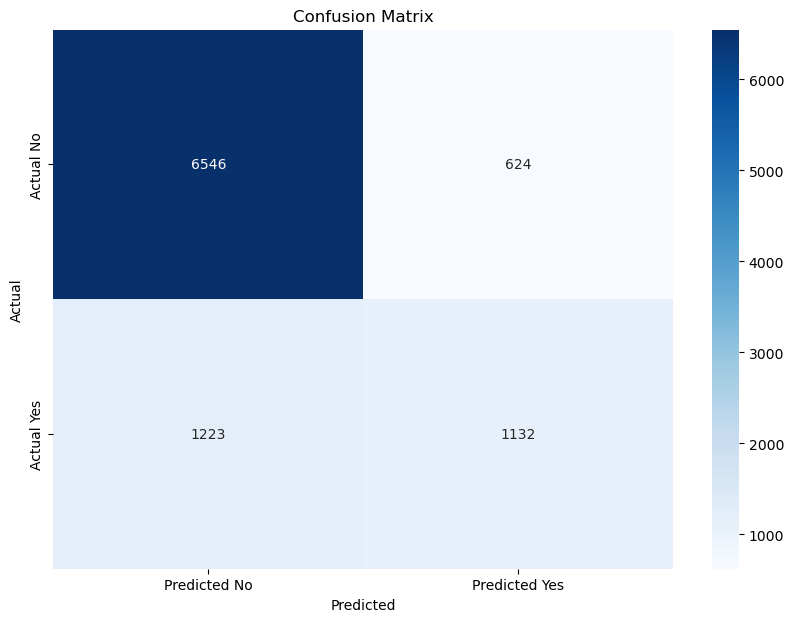

In [23]:
cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()